In [1]:
import csv
import numpy as np
# Path to your CSV file
csv_file = "AV_512_features_labels_new_all.csv"

# Initialize a list to store the features
features_list = []

# Read the CSV file
with open(csv_file, "r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    # Iterate through each row in the CSV file
    for row in reader:
        # Strip the square brackets and split the row string by space
        values = row[0].strip("[]").split()
        # Convert each value to float and store in a list
        feature_row = [float(val) for val in values]
        # Append the feature row to the features list
        features_list.append(feature_row)

# Convert the list of lists into a NumPy array
features_array = np.array(features_list)

# Check the shape of the array
print("Features shape:", features_array.shape)


Features shape: (748, 512)


In [2]:
import pandas as pd
import numpy as np

# Path to your CSV file
csv_file = "AV_512_features_labels_new_all.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

labels_array = df['labels'].values.reshape(-1, 1)

# Convert the extracted features and labels into NumPy arrays

labels_array = np.array(labels_array)

# Check the shapes of the arrays

print("Labels shape:", labels_array.shape)


Labels shape: (748, 1)


In [3]:
P=features_array
T=labels_array

In [45]:
import numpy as np

def initialize_parameters(n_x, n_y):
    np.random.seed(1)
    
    V = np.random.randn(n_x, 1) * 0.01
    W = np.random.randn(n_x, 1) * 0.01
    Vn = 0.01
    
    parameters = {"V": V, "W": W, "Vn": Vn}
    
    return parameters

def relu(x):
    return np.maximum(0, x)

def tansig(x):
    return 2 / (1 + np.exp(-2*x)) - 1


def BelExpert(V,P,Vn,W):
    
    e_A=(np.dot(P,V))+Vn*np.max(P)
    
    e_O=(np.dot(P,W))
    
    f_e_A=tansig(e_A)
    
    f_e_O=tansig(e_O)
    
    f_E=tansig(f_e_A-f_e_O)
    
    return f_E
    

'''def error_fun(E, Y, G):
    e = np.sum(G * (np.square(Y - E)))
    return e'''

def error_fun(Y, T, G):
    e = np.sum(G * (np.square(T - Y)))
    return e

def posterior_prob(G, E, T):
    
    numerator = np.exp(-0.5 * (T-E).reshape(-1,1) * (T-E))
    denominator = np.sum(G * (-0.5 * (T-E).reshape(-1,1) * (T-E)))

    result = numerator / denominator

    return result

def update_params_BEL(W, V, P, Vn, gamma, alpha, beta, T):
    e_A = np.dot(P, V) + Vn * np.max(P)
    e_O = np.dot(P, W)
    f_e_A = tansig(e_A)
    f_e_O = tansig(e_O)
    f_E = tansig(f_e_A - f_e_O)

    dV = -gamma * V + alpha * np.dot(np.maximum(0, T - relu(e_A)).reshape(1, -1), P).reshape(-1, 1)
    V = V + dV

    dW = beta * np.dot((f_E - T).reshape(1, -1), P).reshape(-1, 1)
    W = W + dW
    
    updt = {"V": V, "W": W}
    return updt
    
def update_params_GE(Vg, Wg, Vng, H, P, G, gamma, alpha_g, beta_g):
    e_A = np.dot(P, Vg) + Vng * np.max(P)
    dVg = -gamma * Vg + alpha_g * np.dot(np.maximum(0, H - tansig(e_A)).reshape(1, -1), P).reshape(-1, 1)
    Vg = dVg + Vg
    
    dWg = beta_g * np.dot((G - H).reshape(1, -1), P).reshape(-1, 1)
    Wg = dWg + Wg
    
    updt = {"Vg": Vg, "Wg": Wg}
    return updt



Y is: [[1.73355162e-01]
 [9.12774038e-02]
 [1.75025996e-01]
 [5.63457645e-01]
 [1.21674567e-07]
 [2.91868874e-01]
 [4.95268321e-01]
 [6.89414808e-01]
 [4.57406894e-02]
 [1.80158168e-02]
 [2.17088484e-02]
 [1.19569780e-01]
 [4.56399950e-01]
 [2.41438182e-06]
 [1.14744001e+00]
 [8.30780887e-01]
 [2.60381090e-02]
 [1.00793743e+00]
 [8.63812152e-01]
 [2.60810941e-02]
 [3.72693739e-01]
 [1.77188866e-01]
 [1.98830379e-01]
 [5.33230958e-01]
 [1.93492106e-02]
 [2.62564606e-01]
 [1.04207596e+00]
 [1.01159262e+00]
 [1.45143307e+00]
 [1.20104088e-01]
 [6.70949867e-01]
 [3.07959839e-01]
 [1.36189451e-01]
 [2.73848104e-01]
 [3.82167282e-01]
 [4.03096737e-04]
 [3.43617580e-01]
 [2.55371193e-01]
 [1.06138197e-01]
 [2.30835459e-01]
 [6.70800473e-02]
 [5.74893965e-03]
 [2.27320443e-01]
 [1.50927801e-01]
 [4.44784200e-01]
 [2.89954291e-02]
 [5.00931792e-02]
 [3.00387911e-02]
 [6.33345932e-03]
 [1.10867036e-02]
 [3.20612892e-01]
 [8.24406440e-02]
 [9.02640486e-02]
 [1.54351479e-02]
 [2.91416152e-02]
 [2.

C:\Users\samatha\AppData\Local\Temp\ipykernel_8572\1686452228.py:18: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2*x)) - 1


Y is: [[-1.0877059 ]
 [-1.15226088]
 [-1.0436597 ]
 [-0.9736365 ]
 [-1.09413759]
 [-1.0735399 ]
 [-1.02364469]
 [-1.08560685]
 [-1.0992168 ]
 [-1.14558421]
 [-1.14814346]
 [-1.0644673 ]
 [-1.03737064]
 [-1.13641906]
 [-0.74460147]
 [-0.65544205]
 [-1.07281508]
 [-0.66762564]
 [-0.5341236 ]
 [-0.97468514]
 [-0.99668881]
 [-1.14458389]
 [-1.03252985]
 [-0.55857012]
 [-0.84351624]
 [-1.14441943]
 [-1.08174171]
 [-0.52103349]
 [-0.23251834]
 [-1.15327467]
 [-1.13355734]
 [-0.80810168]
 [-1.05601273]
 [-1.14663054]
 [-1.13148211]
 [-1.02017873]
 [-1.04165747]
 [-1.12521667]
 [-0.77323239]
 [-0.8926515 ]
 [-0.73920418]
 [-1.156337  ]
 [-1.01843914]
 [-1.10464078]
 [-0.89071023]
 [-1.1532225 ]
 [-1.10708549]
 [-1.12000922]
 [-0.74353406]
 [-1.15811231]
 [-1.08292494]
 [-0.99993396]
 [-1.13305388]
 [-1.15076894]
 [-1.02667406]
 [-0.89057365]
 [-1.1311911 ]
 [-0.84158231]
 [-1.1258712 ]
 [-1.1560366 ]
 [-0.7696507 ]
 [-1.10879624]
 [-1.15780167]
 [-1.11380224]
 [-1.12556558]
 [-1.14433931]
 [-0

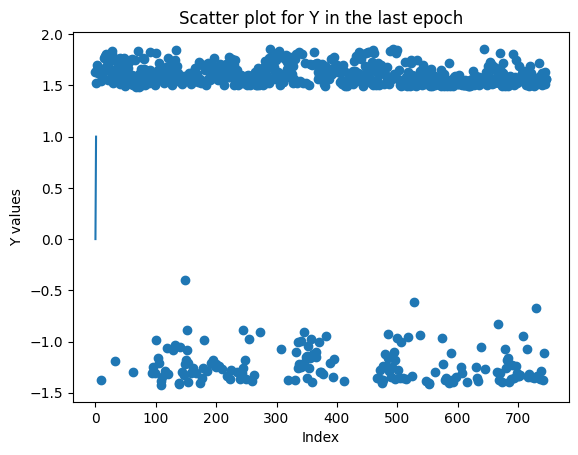

In [46]:
import matplotlib.pyplot as plt

def MODEL(num_epochs, P, T, gamma, alpha, beta, alpha_g, beta_g):
    params1 = initialize_parameters(512, 1)
    params2 = initialize_parameters(512, 1)
    params3 = initialize_parameters(512, 1)
    params4 = initialize_parameters(512, 1)
    
    hist = []
    V1 = params1["V"]
    W1 = params1["W"]
    Vn1 = params1["Vn"]
    
    V2 = params2["V"]
    W2 = params2["W"]
    Vn2 = params2["Vn"]
    
    Vg1 = params3["V"]
    Wg1 = params3["W"]
    Vng1 = params3["Vn"]
    
    Vg2 = params4["V"]
    Wg2 = params4["W"]
    Vng2 = params4["Vn"]
    
    for epoch in range(num_epochs):
        E1 = bel_expert(V1, P, Vn1, W1)
        E2 = bel_expert(V2, P, Vn2, W2)
        
        G1 = bel_expert(Vg1, P, Vng1, Wg1)
        G2 = bel_expert(Vg2, P, Vng2, Wg2)
    
        H1 = posterior_prob(G1, E1, T)
        H2 = posterior_prob(G2, E2, T)

        E = np.array([[E1], [E2]])
        G = np.array([[G1], [G2]])
    
        Y = (E1 * G2)+(E2 * G1)
        error = error_fun(Y, T, G)
        print("Y is:",Y)
        hist.append(error)
    
        U1 = update_params_BEL(W1, V1, P, Vn1, gamma, alpha, beta, T)
        U2 = update_params_BEL(W2, V2, P, Vn2, gamma, alpha, beta, T)
        V1 = U1["V"]
        W1 = U1["W"]
    
        V2 = U2["V"]
        W2 = U2["W"]
    
        U3 = update_params_GE(Vg1, Wg1, Vng1, H2, P, G1, gamma, alpha_g, beta_g)
        U4 = update_params_GE(Vg2, Wg2, Vng2, H1, P, G2, gamma, alpha_g, beta_g)
        Vg1 = U3["Vg"]
        Wg1 = U3["Wg"]
    
        Vg2 = U4["Vg"]
        Wg2 = U4["Wg"]
    
    return Y

# Assuming P and T are your input features and target labels, respectively
# P = np.random.rand(512, 1)
# T = np.array([[5], [4]])  # Assuming both experts have the same target label

Y_last_epoch = MODEL(10, P, T, 1.0, 0.099, 0.099, 1.0, 1.0)

# Plotting the scatter plot for the last epoch of Y
plt.scatter(range(len(Y_last_epoch)), Y_last_epoch)
plt.plot([0,1],[0,1])
plt.xlabel('Index')
plt.ylabel('Y values')
plt.title('Scatter plot for Y in the last epoch')
plt.show()


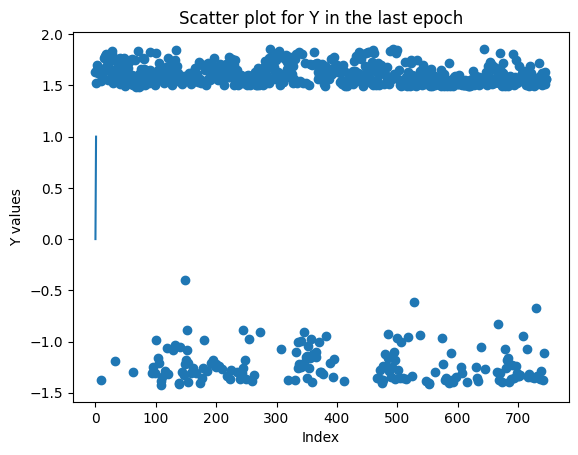

In [47]:
plt.scatter(range(len(Y_last_epoch)), Y_last_epoch)
plt.plot([0,1],[0,1])
plt.xlabel('Index')
plt.ylabel('Y values')
plt.title('Scatter plot for Y in the last epoch')
plt.show()